In [5]:
import sys

sys.path.append("lib")

from functorch import vmap

import matplotlib.pyplot as plt

import lib
import torch
import math

In [9]:
N = 100
mesh = lib.mesh.LineMesh({"xmin": 0, "xmax": 10, "N": N})
elems = mesh.elems()

def ic(x):
    return torch.sin(x[0])

problem = lib.problem.FEProblem(mesh)
problem.add_variable("u", ic)
problem.variables["u"]

tensor([ 0.0000,  0.0998,  0.1987,  0.2955,  0.3894,  0.4794,  0.5646,  0.6442,
         0.7174,  0.7833,  0.8415,  0.8912,  0.9320,  0.9636,  0.9854,  0.9975,
         0.9996,  0.9917,  0.9738,  0.9463,  0.9093,  0.8632,  0.8085,  0.7457,
         0.6755,  0.5985,  0.5155,  0.4274,  0.3350,  0.2392,  0.1411,  0.0416,
        -0.0584, -0.1577, -0.2555, -0.3508, -0.4425, -0.5298, -0.6119, -0.6878,
        -0.7568, -0.8183, -0.8716, -0.9162, -0.9516, -0.9775, -0.9937, -0.9999,
        -0.9962, -0.9825, -0.9589, -0.9258, -0.8835, -0.8323, -0.7728, -0.7055,
        -0.6313, -0.5507, -0.4646, -0.3739, -0.2794, -0.1822, -0.0831,  0.0168,
         0.1165,  0.2151,  0.3115,  0.4049,  0.4941,  0.5784,  0.6570,  0.7290,
         0.7937,  0.8504,  0.8987,  0.9380,  0.9679,  0.9882,  0.9985,  0.9989,
         0.9894,  0.9699,  0.9407,  0.9022,  0.8546,  0.7985,  0.7344,  0.6630,
         0.5849,  0.5010,  0.4121,  0.3191,  0.2229,  0.1245,  0.0248, -0.0752,
        -0.1743, -0.2718, -0.3665, -0.45

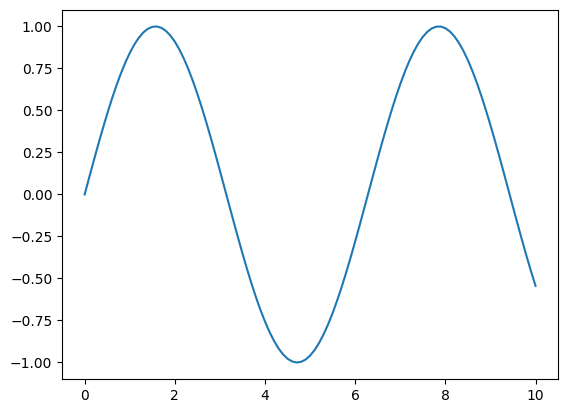

In [10]:
plt.figure()
plt.plot(mesh.coordinates[:,0],problem.variables["u"])
plt.show()

In [25]:
Nx = 10
Ny = 10
mesh = lib.mesh.RectangleMesh({"xmin": 0, "xmax": 10, "ymin": 0, "ymax": 10, "Nx": Nx, "Ny": Ny})

def ic(x):
    return torch.sin(x[0]) + torch.cos(x[1])

problem = lib.problem.FEProblem(mesh)
problem.add_variable("u", ic)
problem.variables["u"]

tensor([ 1.0000e+00,  5.4030e-01, -4.1615e-01, -9.8999e-01, -6.5364e-01,
         2.8366e-01,  9.6017e-01,  7.5390e-01, -1.4550e-01, -9.1113e-01,
        -8.3907e-01,  1.8415e+00,  1.3818e+00,  4.2532e-01, -1.4852e-01,
         1.8783e-01,  1.1251e+00,  1.8016e+00,  1.5954e+00,  6.9597e-01,
        -6.9659e-02,  2.3994e-03,  1.9093e+00,  1.4496e+00,  4.9315e-01,
        -8.0695e-02,  2.5565e-01,  1.1930e+00,  1.8695e+00,  1.6632e+00,
         7.6380e-01, -1.8328e-03,  7.0226e-02,  1.1411e+00,  6.8142e-01,
        -2.7503e-01, -8.4887e-01, -5.1252e-01,  4.2478e-01,  1.1013e+00,
         8.9502e-01, -4.3800e-03, -7.7001e-01, -6.9795e-01,  2.4320e-01,
        -2.1650e-01, -1.1729e+00, -1.7468e+00, -1.4104e+00, -4.7314e-01,
         2.0337e-01, -2.9002e-03, -9.0230e-01, -1.6679e+00, -1.5959e+00,
         4.1076e-02, -4.1862e-01, -1.3751e+00, -1.9489e+00, -1.6126e+00,
        -6.7526e-01,  1.2460e-03, -2.0502e-01, -1.1044e+00, -1.8701e+00,
        -1.7980e+00,  7.2058e-01,  2.6089e-01, -6.9

In [27]:
import meshio

output = meshio.Mesh(
    mesh.coordinates,
    [("quad", mesh.connectivity)],
    point_data={"u": problem.variables["u"]},
)
output.write("foo.vtk")